In [1]:
!pip install pandas
!pip install metapy
!pip install pyspark
!pip install nltk
!pip install boto3
!pip install sklearn
!pip install matplotlib
!pip install TextBlob
!pip install numpy

In [2]:
import pandas as pd
import metapy
import boto3
import matplotlib.pyplot as plt

In [3]:
s3 = boto3.client('s3')
obj = s3.get_object(Bucket='finaltext', Key='news.csv')
df = pd.read_csv(obj['Body'])

In [4]:
df.head()

,id,id_news,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142570 entries, 0 to 142569
Data columns (total 10 columns):
id             142570 non-null int64
id_news        142570 non-null int64
title          142568 non-null object
publication    142570 non-null object
author         126694 non-null object
date           139929 non-null object
year           139929 non-null float64
month          139929 non-null float64
url            85559 non-null object
content        142570 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 10.9+ MB


In [6]:
newdf= df[df.columns[2]] + df[df.columns[4]]+ df[df.columns[9]]
df2 = pd.DataFrame(newdf)
df2.head()

,0
0,House Republicans Fret About Winning Their Hea...
1,Rift Between Officers and Residents as Killing...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ..."
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi..."
4,Kim Jong-un Says North Korea Is Preparing to T...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import re

textclean=[]

for document in df2[0]:
    line_clean = ""    
    tokens = str(document).split()
    tokens = [re.sub(r'[^A-Za-z0-9 ]+','',w) for w in tokens]
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w.lower() for w in tokens if len(w)>1]
    for w in tokens:
        line_clean=line_clean+w+" "
    textclean.append(line_clean)
        
df2[1]=textclean 

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = None)

Infodoc = CountVectorizer().fit(df2[1])
bag_of_words = Infodoc.transform(df2[1])
Vacabulary=list(Infodoc.vocabulary_.keys())

print( "Se tienen los siguientes "+str(len(Vacabulary))+" tokens")

df2.head()

Se tienen los siguientes 442112 tokens


,0,1
0,House Republicans Fret About Winning Their Hea...,house republicans fret about winning their hea...
1,Rift Between Officers and Residents as Killing...,rift between officers and residents as killing...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",tyrus wong bambi artist thwarted by racial bia...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",among deaths in heavy toll in pop music the ne...
4,Kim Jong-un Says North Korea Is Preparing to T...,kim jongun says north korea is preparing to te...


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hadoop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#remocion de stopwords
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))

textclean=[]

for document in df2[1]:
    line_clean = ""    
    tokens = str(document).split()
    tokens = [w for w in tokens if w not in stop_words_nltk]
    for w in tokens:
        line_clean=line_clean+w+" "
    textclean.append(line_clean)
        
df2[2]=textclean 

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = None)

Infodoc = CountVectorizer().fit(df2[2])
bag_of_words = Infodoc.transform(df2[2])
Vacabulary=list(Infodoc.vocabulary_.keys())

print( "Luego de aplicar stopwords NLTK qse tienen "+str(len(Vacabulary))+" tokens")
df2.head()

Luego de aplicar stopwords NLTK qse tienen 441969 tokens


,0,1,2
0,House Republicans Fret About Winning Their Hea...,house republicans fret about winning their hea...,house republicans fret winning health care sui...
1,Rift Between Officers and Residents as Killing...,rift between officers and residents as killing...,rift officers residents killings persist south...
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",tyrus wong bambi artist thwarted by racial bia...,tyrus wong bambi artist thwarted racial bias d...
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",among deaths in heavy toll in pop music the ne...,among deaths heavy toll pop music new york tim...
4,Kim Jong-un Says North Korea Is Preparing to T...,kim jongun says north korea is preparing to te...,kim jongun says north korea preparing test lon...


In [10]:
# Realice un TF (Term Frecuency) por cada una de las palabras del conjunto de datos final.

Infodoc = CountVectorizer().fit(df2[2])
Vacabulary=list(Infodoc.vocabulary_.keys())
bag_of_words = Infodoc.transform(df2[2])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in Infodoc.vocabulary_.items()]

print(words_freq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
#imprima el top-20 descendiente de las palabras más frecuentes en el BoW.
print("8.3 ordenamos los datos en orden descendente y mostramos las 20 palabras de mayor TF en el BoW")
pd.set_option('display.max_rows', 100)
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df3=pd.DataFrame(words_freq,columns=['Word', 'TF'])
df3.head(20)


8.3 ordenamos los datos en orden descendente y mostramos las 20 palabras de mayor TF en el BoW


,Word,TF
0,said,515582
1,trump,348699
2,would,243631
3,one,240249
4,people,226440
5,new,200488
6,like,165708
7,also,165019
8,president,148684
9,could,134212


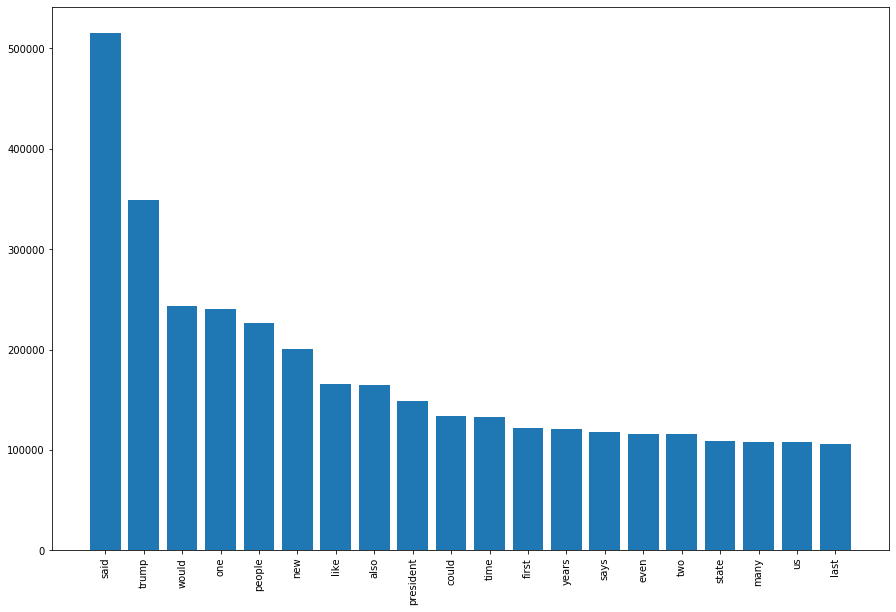

In [12]:
# Realice la grafica de barras en matplotlib de estas 20 palabras en orden descendentes.
plt.figure(figsize=(15,10))
plt.bar(df3['Word'][:20],df3['TF'][:20])
plt.xticks(rotation=90)
plt.show()

In [13]:
from textblob import TextBlob

In [14]:
def sentiment_func(lyrics):
    try:
        return TextBlob(lyrics).sentiment
    except:
        return None

In [15]:
df['sentimientos'] = df2[df2.columns[2]].apply(sentiment_func)

In [16]:
df['sentimientos'][0][0]

df['polaridad'] = df['sentimientos'].apply(lambda x: x[0])
df['Subjetividad'] = df['sentimientos'].apply(lambda x: x[1])

In [17]:
df.head()

,id,id_news,title,publication,author,date,year,month,url,content,sentimientos,polaridad,Subjetividad
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,"(0.045241278329513634, 0.4619970715558951)",0.045241,0.461997
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","(-0.06568370636455746, 0.3704309508458444)",-0.065684,0.370431
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...","(0.036745404354100016, 0.4226690037016123)",0.036745,0.422669
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","(0.11145660095300383, 0.4514190725341804)",0.111457,0.451419
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...","(0.1448773448773449, 0.5208874458874458)",0.144877,0.520887


In [18]:
Result=['positivo' if x>0 else "negativo" for x in df['polaridad']]
df['feeling']=Result
df.head()

,id,id_news,title,publication,author,date,year,month,url,content,sentimientos,polaridad,Subjetividad,feeling
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,"(0.045241278329513634, 0.4619970715558951)",0.045241,0.461997,positivo
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...","(-0.06568370636455746, 0.3704309508458444)",-0.065684,0.370431,negativo
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...","(0.036745404354100016, 0.4226690037016123)",0.036745,0.422669,positivo
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...","(0.11145660095300383, 0.4514190725341804)",0.111457,0.451419,positivo
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...","(0.1448773448773449, 0.5208874458874458)",0.144877,0.520887,positivo


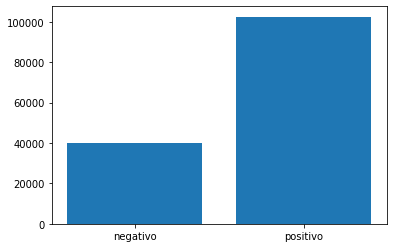

In [21]:
import numpy as np
labels, counts = np.unique(Result, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()